## 데이터 불러오기

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from scipy import stats 
from collections import Counter

import missingno as msno 
plt.style.use('seaborn') 

import warnings 
warnings.filterwarnings("ignore") 

mpl.rcParams['axes.unicode_minus'] = False # 그래프에서 마이너스 폰트가 깨지는 것에 대한 대처
%matplotlib inline

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 29 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   year           900000 non-null  int64  
 1   id             900000 non-null  int64  
 2   target_sex     900000 non-null  int64  
 3   target_age     900000 non-null  int64  
 4   sido           900000 non-null  int64  
 5   height         900000 non-null  int64  
 6   weight         900000 non-null  int64  
 7   waist          899762 non-null  float64
 8   sight_L        899839 non-null  float64
 9   sight_R        899833 non-null  float64
 10  hear_L         899859 non-null  float64
 11  hear_R         899861 non-null  float64
 12  bp_high        899982 non-null  float64
 13  bp_low         899983 non-null  float64
 14  blds           899962 non-null  float64
 15  tot_chole      899962 non-null  float64
 16  triglyceride   899960 non-null  float64
 17  hdl_chole      899961 non-nul

In [14]:
# sido = pd.crosstab(df_train['target_sex'], df_train['sido'])

# result = chi2_contingency(observed=sido, correction=True)
# result
# print("1. 카이제곱 통계량:", result[0])
# print("2. p-value:", result[1])
# print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)
# print("4. 기대값 행렬:")
# pd.DataFrame(result[3]).rename(index={0:'남자', 1:'여자'}, columns={0:'비흡연', 1:'흡연'})
 

In [ ]:
# 여기부터 찐만 작성할 거임

## 변수 선언

In [13]:
numerical_features = ['height', 'weight', 'waist', 'sight_L','sight_R',
            'bp_high', 'bp_low', 'blds', 'tot_chole', 'triglyceride', 'hdl_chole', 'ldl_chole', 
            'hmg', 'olig_prote_cd','creatinine', 'sgot_ast', 'sgot_alt', 'gamma_gtp']
categorical_feautures = ['sido', 'hear_L', 'hear_R', 'smk_type', 'drk_yn', 'hchk_yn', 'ttr_yn']

print(len(df_train.columns))
print(len(numerical_features))
print(len(categorical_feautures))

29
18
7


## Numerical feature

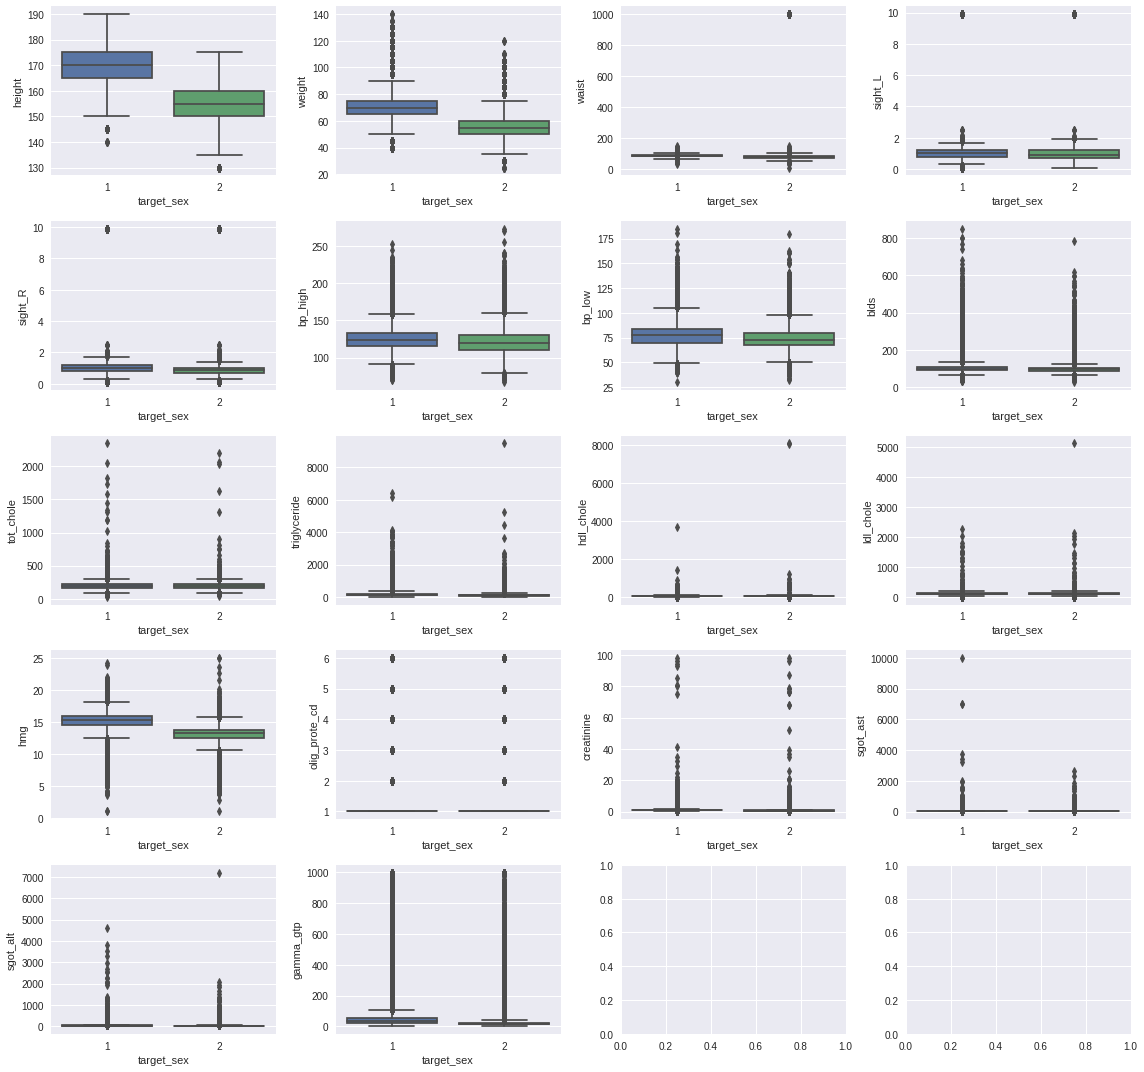

In [ ]:
# target_sex에 대한 전체 boxplot 그려보기

li_cat_feats = list(numerical_features)
nr_rows = 5
nr_cols = 4
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4, nr_rows*3))

for r in range(0, nr_rows):
    for c in range(0, nr_cols):
        i = r * nr_cols + c
        if i < len(li_cat_feats):
            sns.boxplot(data=df_train, x='target_sex', y = li_cat_feats[i], ax=axs[r][c])
plt.tight_layout()
plt.show()

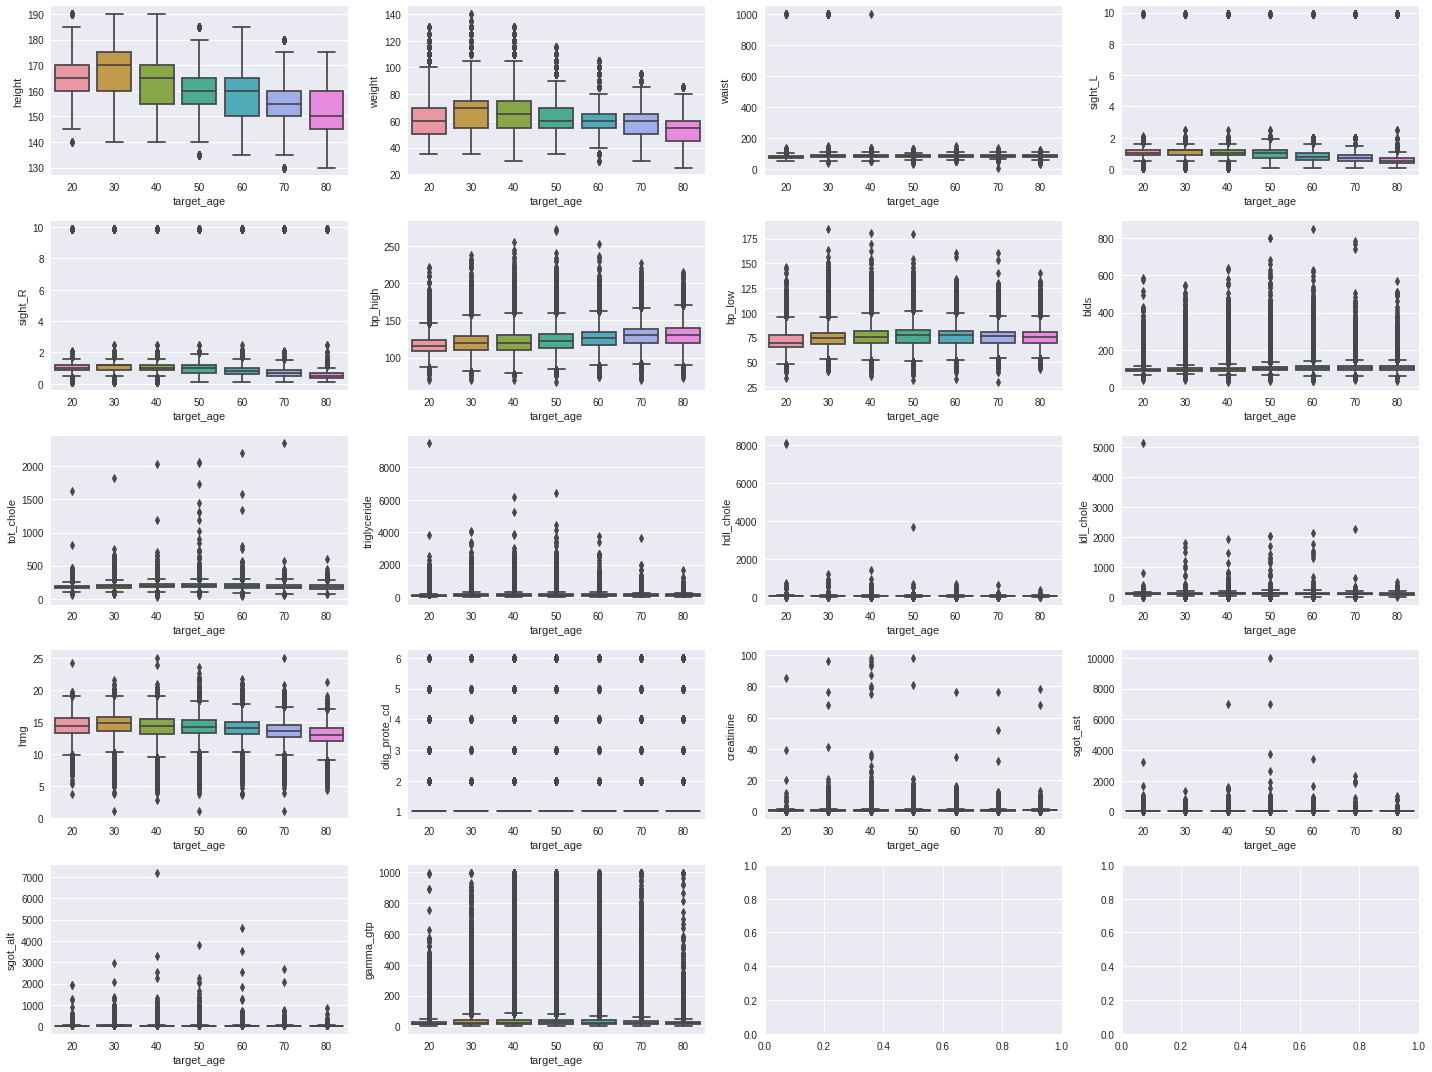

In [ ]:
# target_age에 대한 전체 boxplot 그려보기

li_cat_feats = list(numerical_features)
nr_rows = 5
nr_cols = 4
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*5, nr_rows*3))

for r in range(0, nr_rows):
    for c in range(0, nr_cols):
        i = r * nr_cols + c
        if i < len(li_cat_feats):
            sns.boxplot(data=df_train, x= 'target_age', y = li_cat_feats[i], ax=axs[r][c])
plt.tight_layout()
plt.show()

height, weight, waist

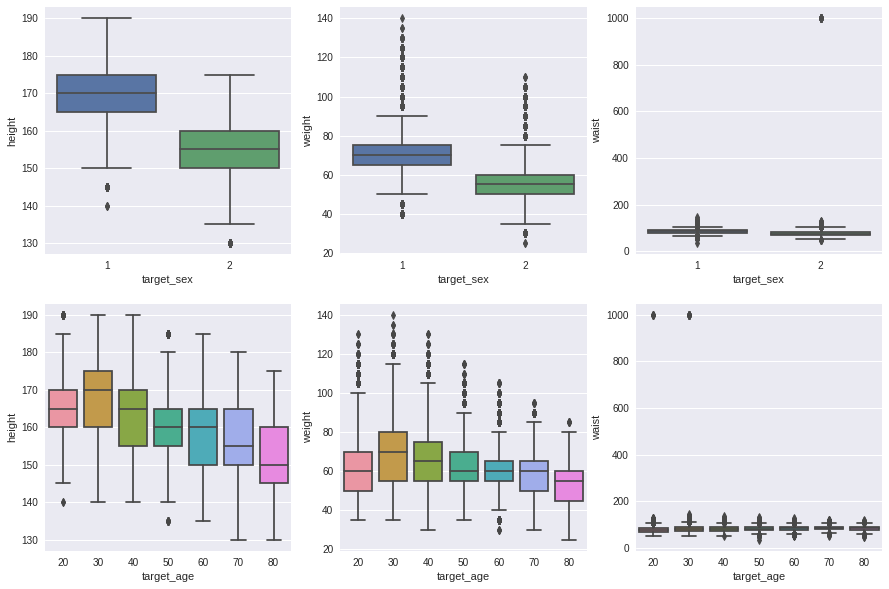

In [7]:
# height, weight, waist

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

sns.boxplot(data=df_train, x='target_sex', y='height',ax=ax[0][0])
sns.boxplot(data=df_train, x='target_sex', y='weight',ax=ax[0][1])
sns.boxplot(data=df_train, x='target_sex', y='waist',ax=ax[0][2])
sns.boxplot(data=df_train, x='target_age', y='height',ax=ax[1][0])
sns.boxplot(data=df_train, x='target_age', y='weight',ax=ax[1][1])
sns.boxplot(data=df_train, x='target_age', y='waist',ax=ax[1][2])

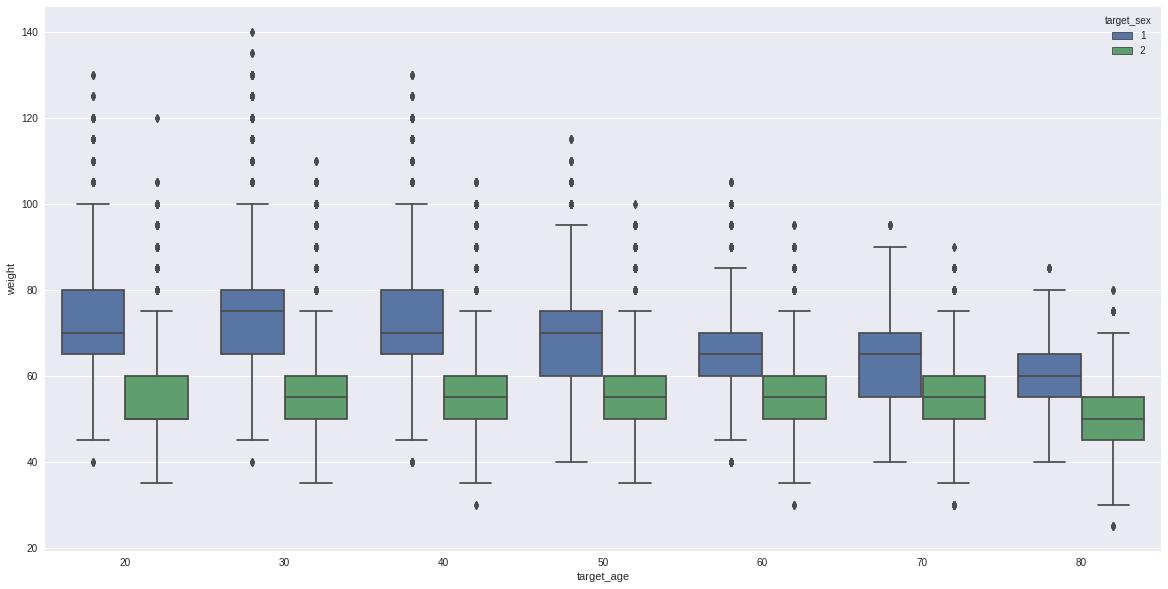

In [ ]:
plt.figure(figsize=(20,10))

sns.boxplot(data=df_train, x='target_age', y='weight',hue='target_sex')

sight_R, sightL

In [ ]:
# sight_R, sight_L
print(df_train['sight_L'].describe())
print(df_train['sight_R'].max())
# min 0.1 ~ max 9.9

count    899839.000000
mean          0.980486
std           0.610039
min           0.100000
25%           0.700000
50%           1.000000
75%           1.200000
max           9.900000
Name: sight_L, dtype: float64
9.9


In [ ]:
# sight_L, sight_R : 9.9 는 실명

df_train.loc[df_train['sight_L']==9.9] 

,year,id,target_sex,target_age,sido,height,weight,waist,sight_L,sight_R,...,hmg,olig_prote_cd,creatinine,sgot_ast,sgot_alt,gamma_gtp,smk_type,drk_yn,hchk_yn,ttr_yn
69,2017,78,1,60,48,165,70,94.0,9.9,9.9,...,15.6,1.0,0.7,19.0,16.0,29.0,2.0,Y,N,NaN
292,2017,326,2,70,11,150,60,95.0,9.9,0.2,...,14.7,5.0,0.9,15.0,17.0,12.0,1.0,N,N,NaN
596,2017,663,1,70,42,165,90,111.0,9.9,1.0,...,14.8,1.0,1.1,17.0,14.0,19.0,1.0,Y,Y,Y
1253,2017,1393,1,60,28,160,65,91.0,9.9,0.9,...,16.8,1.0,0.8,19.0,19.0,75.0,3.0,Y,N,NaN
1309,2017,1456,1,70,41,170,70,89.0,9.9,0.7,...,14.0,2.0,1.5,23.0,24.0,74.0,1.0,N,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898578,2017,998421,1,50,31,155,65,83.0,9.9,9.9,...,16.1,1.0,1.1,31.0,40.0,36.0,1.0,Y,N,NaN
899539,2017,999489,1,50,27,170,70,83.0,9.9,1.0,...,16.5,1.0,1.1,24.0,17.0,19.0,3.0,Y,N,NaN
899568,2017,999521,1,70,42,160,70,100.0,9.9,0.3,...,13.5,1.0,1.0,19.0,14.0,19.0,2.0,N,N,NaN
899766,2017,999741,2,50,29,165,50,75.0,9.9,1.0,...,12.4,1.0,0.6,25.0,20.0,60.0,1.0,Y,N,NaN


In [ ]:
# 양쪽 눈 둘 다 실명인 사람 

abnormal = df_train.loc[((df_train['sight_L']== 9.9)&(df_train['sight_R']==9.9))]
len(abnormal) # 462명

# 그냥 따로 확인하자.....

462

897117


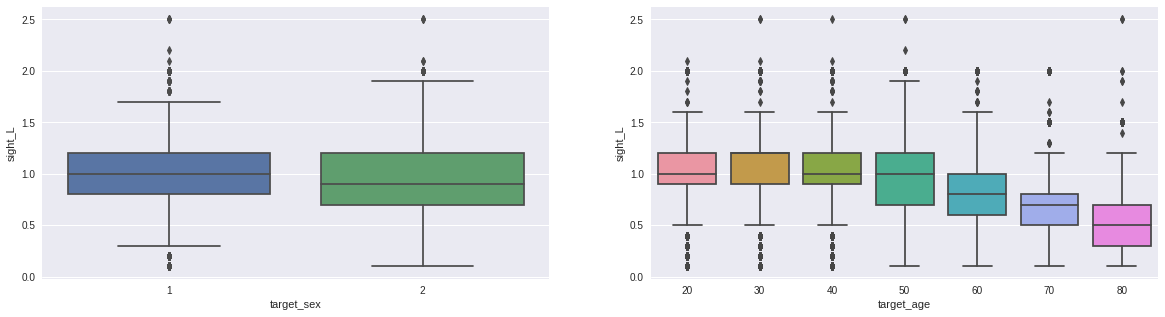

In [ ]:
# sigh_L 실명 제외하고 boxplot그리기

normal = df_train.loc[-(df_train['sight_L']== 9.9)]
print(len(normal)) # 897117명

fig, ax = plt.subplots(ncols=2, figsize=(20,5))

sns.boxplot(data=normal, x='target_sex', y = 'sight_L', ax=ax[0])
sns.boxplot(data=normal, x='target_age', y = 'sight_L',ax = ax[1])

# 성별에 왼쪽 시력 상관없음
# 50대부터 왼쪽 시력이 점점 저하됨을 알 수 있음

897125


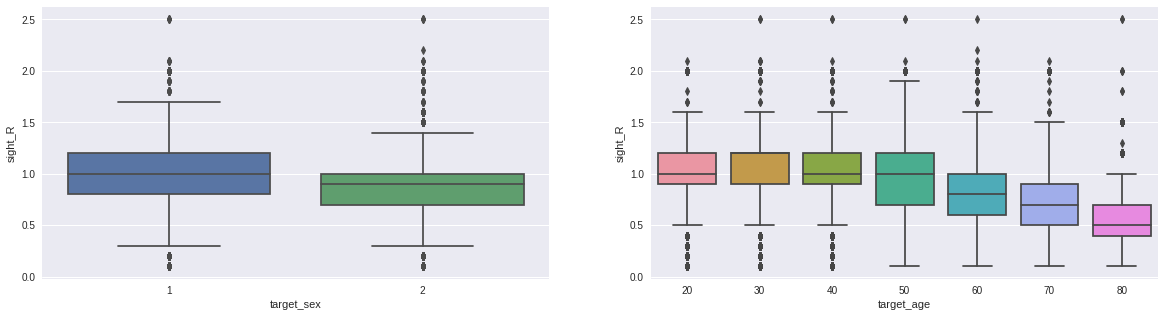

In [ ]:
# sigh_R 실명 제외하고 boxplot그리기

normal = df_train.loc[-(df_train['sight_R']== 9.9)]
print(len(normal)) # 897125 - 왼, 좌 비슷함

fig, ax = plt.subplots(ncols=2, figsize=(20,5))

sns.boxplot(data=normal, x='target_sex', y = 'sight_R', ax=ax[0])
sns.boxplot(data=normal, x='target_age', y = 'sight_R',ax = ax[1])

# 오른쪽 시력은 여성이 남성보다 더 안좋음
# 오른쪽 시력도 50대부터 저하됨

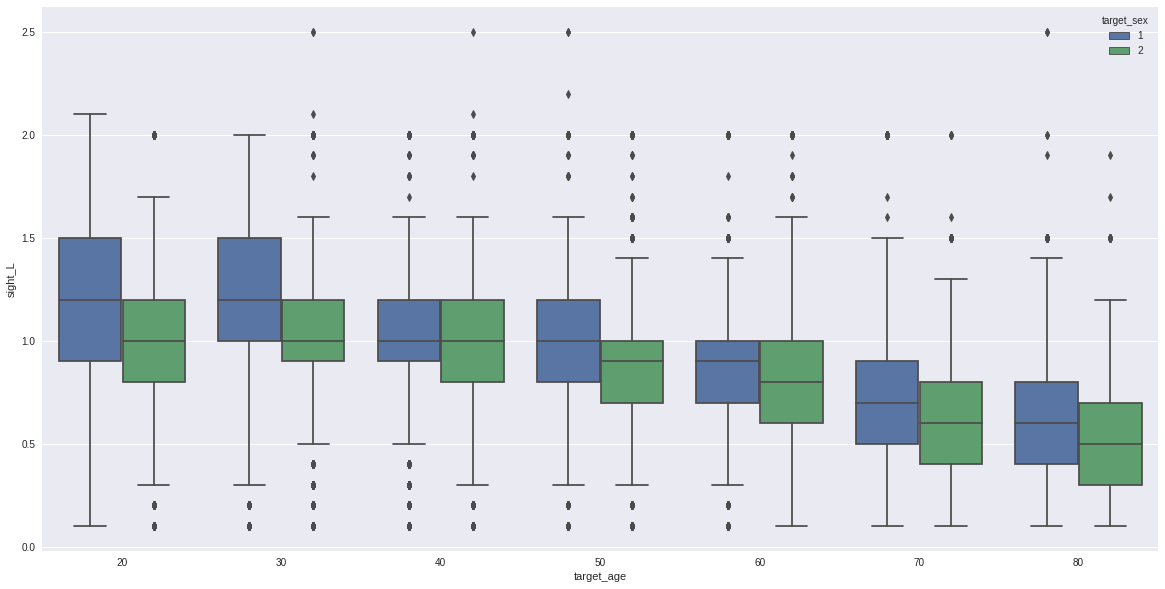

In [ ]:
plt.figure(figsize=(20,10))

sns.boxplot(data=normal, x='target_age', y='sight_L', hue='target_sex')

894704


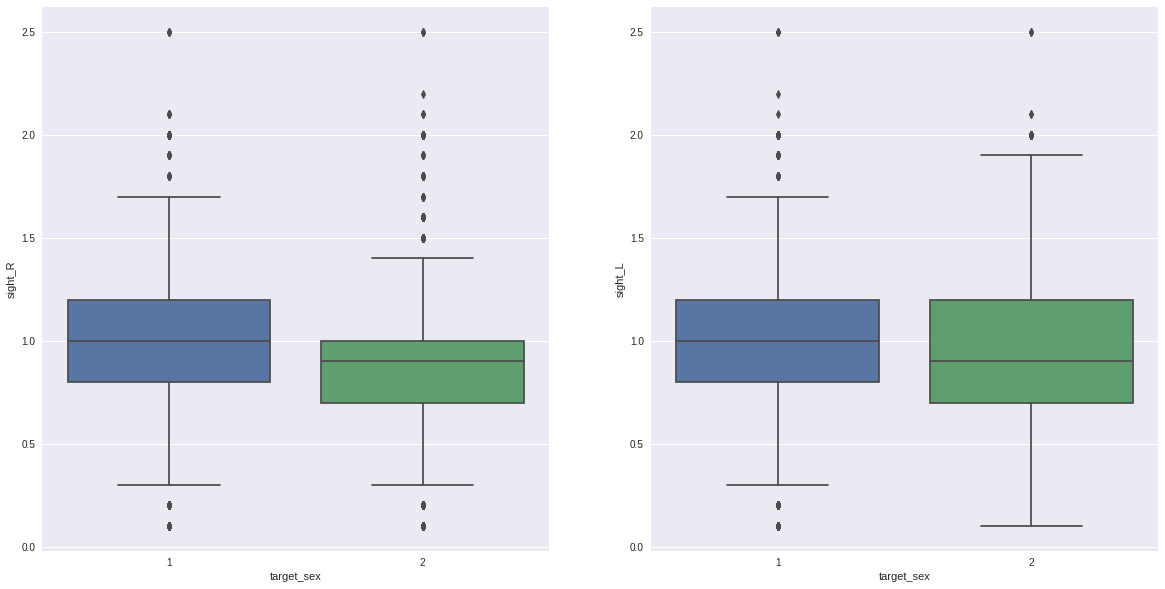

In [ ]:
normal = df_train.loc[-((df_train['sight_R']== 9.9)|(df_train['sight_L']==9.9))]
print(len(normal)) # 897125 - 왼, 좌 비슷함

fig, ax = plt.subplots(ncols=2, figsize=(20,10))

sns.boxplot(data=normal, x='target_sex', y = 'sight_R', ax=ax[0])
sns.boxplot(data=normal, x='target_sex', y = 'sight_L', ax=ax[1])

bp_hight, bp_low, blds

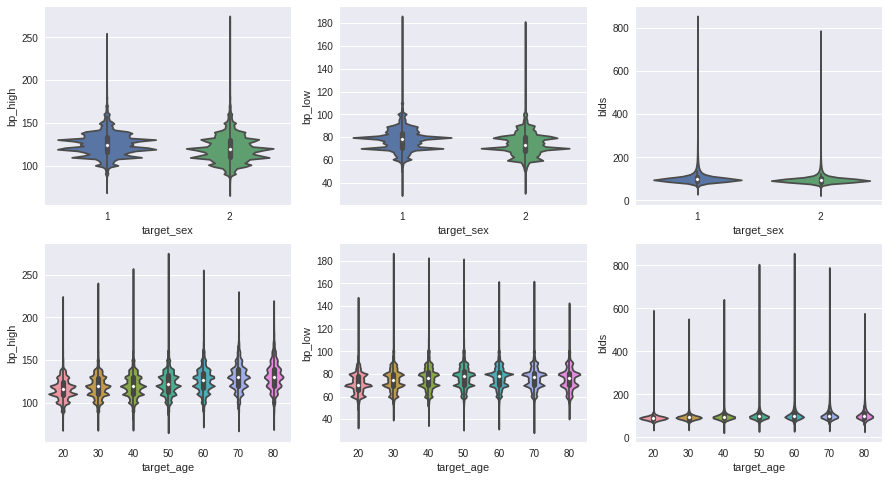

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15,8))

sns.violinplot(data=df_train, x='target_sex', y='bp_high', ax=ax[0][0])
sns.violinplot(data=df_train, x='target_sex', y='bp_low', ax=ax[0][1])
sns.violinplot(data=df_train, x='target_sex', y='blds', ax=ax[0][2]) 
sns.violinplot(data=df_train, x='target_age', y='bp_high', ax=ax[1][0]) 
sns.violinplot(data=df_train, x='target_age', y='bp_low', ax=ax[1][1]) 
sns.violinplot(data=df_train, x='target_age', y='blds', ax=ax[1][2]) 
# 성별간, 연령대별 차이가 없

tot_chole, triglyceride, hdl_chole, ldl_chole

ALL normal :  308286


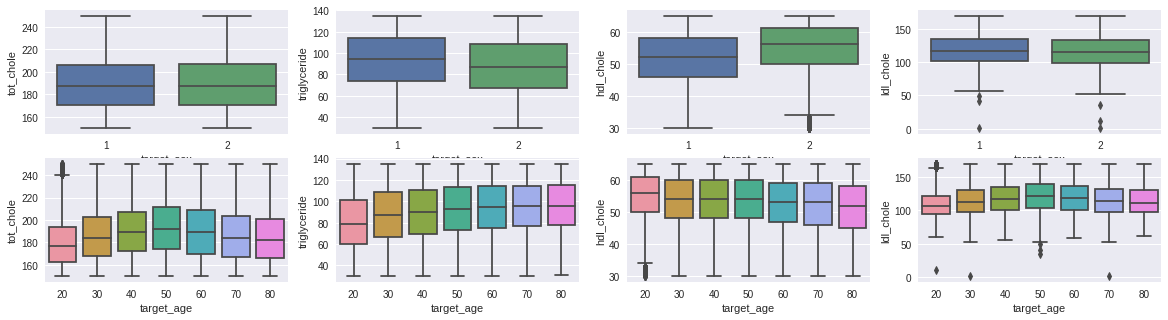

In [ ]:
# 모든 수치가 정상치인

normal = df_train.loc[ ((df_train['tot_chole']>=150)&(df_train['tot_chole'] <= 250)) & ((df_train['triglyceride']>=30)&(df_train['triglyceride'] <= 135)) & ((df_train['hdl_chole']>=30) & (df_train['hdl_chole'] <= 65)) & (df_train['ldl_chole'] <= 170)]
print("ALL normal : ", len(normal))

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20,5))

sns.boxplot(data=normal, x='target_sex', y='tot_chole', ax=ax[0][0])
sns.boxplot(data=normal, x='target_sex', y='triglyceride',ax=ax[0][1])
sns.boxplot(data=normal, x='target_sex', y='hdl_chole',ax=ax[0][2]) 
sns.boxplot(data=normal, x='target_sex', y='ldl_chole', ax=ax[0][3])
sns.boxplot(data=normal, x='target_age', y='tot_chole',  ax=ax[1][0])
sns.boxplot(data=normal, x='target_age', y='triglyceride',ax=ax[1][1])
sns.boxplot(data=normal, x='target_age', y='hdl_chole', ax=ax[1][2]) 
sns.boxplot(data=normal, x='target_age', y='ldl_chole', ax=ax[1][3])


# 뭐 크게 다른건 딱히 없고 모든 수치가 정상인 여성은
# hdl_chole 수치가 남성보다 높음

In [ ]:
# tot_chole 정상치 150~ 250

normal = df_train.loc[(df_train['tot_chole']>=150) & (df_train['tot_chole'] <= 250)]
print("normal : ",len(normal))

abnormal = df_train.loc[-((df_train['tot_chole']>=150) & (df_train['tot_chole'] <= 250))]
print("abnormal : ",len(abnormal))

normal :  736462
abnormal :  163538


In [ ]:
df_train['tot_chole'].isnull().sum() # 38개  - 이거 어떻게 보완할까?
# 결측치가 존재하기 때문에 위 숫자의 오류가 생김

38

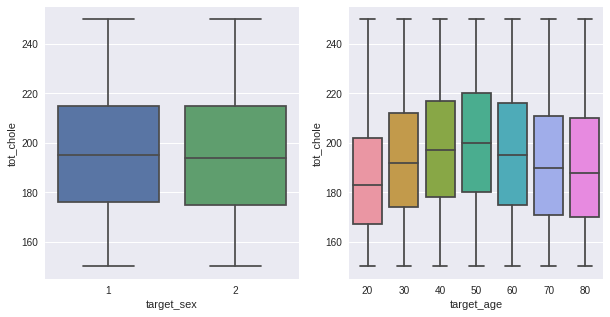

In [ ]:
# 정상범주일때
fig, ax = plt.subplots(ncols=2, figsize=(10,5))

sns.boxplot(data=normal, x='target_sex', y = 'tot_chole', ax=ax[0])
sns.boxplot(data=normal, x='target_age', y='tot_chole', ax=ax[1])

# 정상 범주의 경우, 성별과 총콜레스테롤 수치는 차이가 없다 
# 나이도 별 차이 없음
# 20대가 제일 젊네

In [ ]:
# 정상은 재미없다 비정상 알아보자

print("남성의 total_chole abnormal percent : ", 100*len(abnormal.loc[(abnormal['target_sex']==1)]) / len(df_train.loc[(df_train['target_sex']==1)]))
print("여성의 total_chole abnormal percent : ", 100*len(abnormal.loc[(abnormal['target_sex']==2)]) / len(df_train.loc[(df_train['target_sex']==2)]))

age_list = abnormal['target_age'].value_counts().sort_values(ascending=False).index

for i in range(len(age_list)):
  print(age_list[i], 'Percent of abnormal value : {:.2f}'.format(100*len(abnormal.loc[(abnormal['target_age']==age_list[i])]) / len(df_train.loc[(df_train['target_age']==age_list[i])])))


# 성별에 대해서 비정상은 크게 작용하지 않음
# 80대의 총 콜레스테롤 수치가 높고, 30대, 40대에 높음 아마 건강관리를 해서 그런거 아닐까?

남성의 total_chole abnormal percent :  18.656112901265864
여성의 total_chole abnormal percent :  17.62298378511372
50 Percent of abnormal value : 19.15
40 Percent of abnormal value : 15.07
60 Percent of abnormal value : 21.89
30 Percent of abnormal value : 14.28
70 Percent of abnormal value : 24.81
20 Percent of abnormal value : 17.21
80 Percent of abnormal value : 26.34


In [ ]:
# triglyceride 정상치 30~135
normal = df_train.loc[(df_train['triglyceride']>= 30) & (df_train['triglyceride']<= 135)]
abnormal = df_train.loc[-((df_train['triglyceride']>= 30) & (df_train['triglyceride']<= 135))]
print("정상 : %s개 \t 비정상 : %s개" %(len(normal),len(abnormal)))

print(df_train['triglyceride'].isnull().sum()) # 결측치 40개

정상 : 589154개 	 비정상 : 310846개
40


In [ ]:
# hdl_chole 정상치 30~65
normal = df_train.loc[(df_train['hdl_chole']>= 30) &(df_train['hdl_chole']<= 65)]
abnormal = df_train.loc[-((df_train['hdl_chole']>= 30) &(df_train['hdl_chole']<= 65))]
print("정상 : %s개 \t 비정상 : %s개" %(len(normal),len(abnormal)))

print(df_train['hdl_chole'].isnull().sum()) # 39개

정상 : 666094개 	 비정상 : 233906개
39


In [ ]:
# id_chole는 170이상은 고LDL혈증임

abnormal =  df_train.loc[(df_train['ldl_chole']>= 170)]
print(len(abnormal))

print(df_train['ldl_chole'].isnull().sum()) # 2629개

51301
2629


In [ ]:
# 성별과 연령대에 따라 확인
# 비율 확인

abnormal.groupby('target_sex')['ldl_chole'].count()

target_sex
1    25744
2    25557
Name: ldl_chole, dtype: int64

In [ ]:
print("남성의 ldl_chole 비정상 비율 : ",100*len(abnormal.loc[(abnormal['target_sex']==1)]) / len(df_train.loc[(df_train['target_sex']==1)]))
print("여성의 ldl_chole 비정상 비율 : ",100*len(abnormal.loc[(abnormal['target_sex']==2)]) / len(df_train.loc[(df_train['target_sex']==2)]))

남성의 ldl_chole 비정상 비율 :  5.393650141838919
여성의 ldl_chole 비정상 비율 :  6.046160615853399


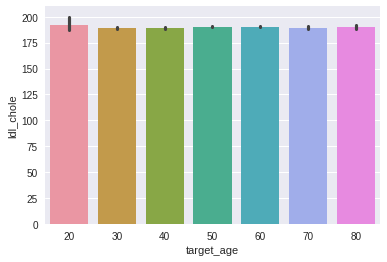

In [ ]:
sns.barplot(data=abnormal, x='target_age', y='ldl_chole') # 평균적으로 걍 170을 넘긴하지만 별 거는 없음

In [ ]:
abnormal['target_age'].value_counts().sort_values()

80      730
20     1344
70     3186
30     6130
60     9421
40    12889
50    17601
Name: target_age, dtype: int64

In [ ]:
age_list = abnormal['target_age'].value_counts().sort_values(ascending=False).index # 이렇게 해도 의미가 없긴 하네

for i in range(len(age_list)):
  print(age_list[i], 'Percent of abnormal value : {:.2f}'.format(100*len(abnormal.loc[(abnormal['target_age']==age_list[i])]) / len(df_train.loc[(df_train['target_age']==age_list[i])])))
  

50 Percent of abnormal value : 8.07
40 Percent of abnormal value : 5.71
60 Percent of abnormal value : 6.53
30 Percent of abnormal value : 4.16
70 Percent of abnormal value : 4.59
20 Percent of abnormal value : 1.72
80 Percent of abnormal value : 4.30


hmg

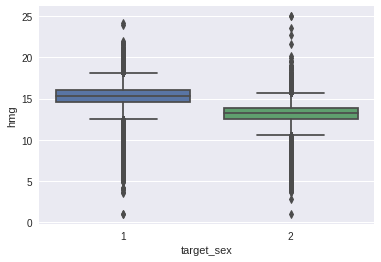

In [ ]:
# 혈색소

sns.boxplot(data=df_train, x='target_sex', y='hmg')

olig_prote_cd

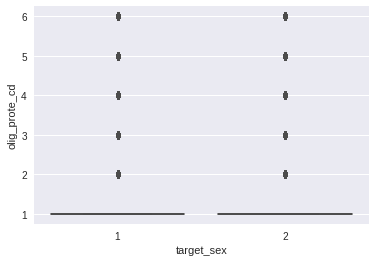

In [ ]:
# 요단백 - 범주형 중에서도 순위 척도를 나타냄

sns.boxplot(data=df_train, x='target_sex', y='olig_prote_cd')

In [ ]:
pd.crosstab(df_train['target_sex'],df_train['olig_prote_cd'], margins=True)

olig_prote_cd,1.0,2.0,3.0,4.0,5.0,6.0,All
target_sex,,,,,,,
1,446966,15398,8422,3537,1140,311,475774
2,397979,12545,6409,2318,651,150,420052
All,844945,27943,14831,5855,1791,461,895826


In [ ]:
pd.crosstab(df_train['target_age'], df_train['olig_prote_cd'], margins=True)

olig_prote_cd,1.0,2.0,3.0,4.0,5.0,6.0,All
target_age,,,,,,,
20,74104,2410,1120,286,79,15,78014
30,139108,4928,1874,542,152,35,146639
40,212167,7491,3373,1194,344,78,224647
50,205665,6355,3561,1416,454,131,217582
60,135247,3963,2721,1312,399,104,143746
70,63652,2197,1676,849,275,69,68718
80,15002,599,506,256,88,29,16480
All,844945,27943,14831,5855,1791,461,895826


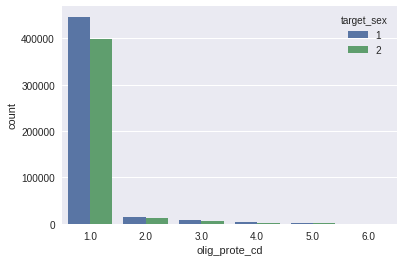

In [ ]:
sns.countplot(data=df_train, x='olig_prote_cd', hue='target_sex')

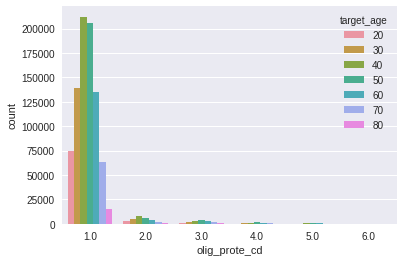

In [ ]:
sns.countplot(data=df_train, x='olig_prote_cd', hue='target_age')

creatinine, sgot_ast, sgot_alt, gamma_gtp

In [ ]:
# creatinine 정상치 0.8~ 1.7

abnormal = df_train.loc[-((df_train['creatinine']>= 0.8) & (df_train['creatinine']<= 1.7))]
print("비정상 : %s " %len(abnormal))

비정상 : 293336 


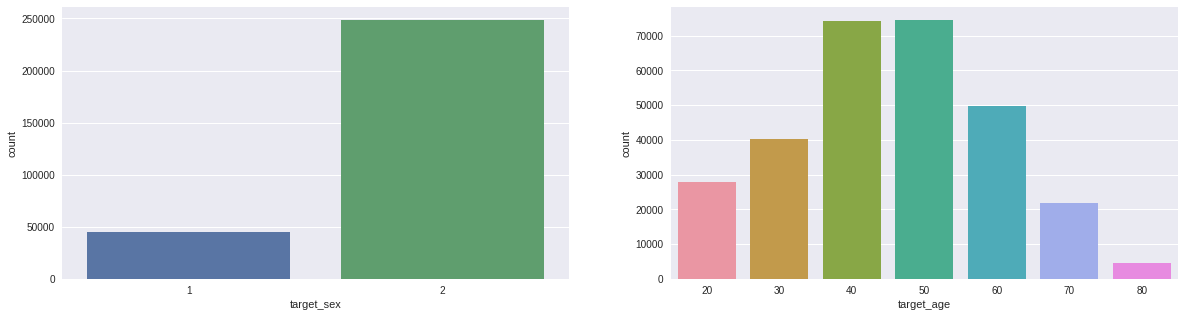

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

sns.countplot(data=abnormal, x='target_sex', ax=ax[0]) # 비정상 수적으로 여자가 더 많음
sns.countplot(data=abnormal, x='target_age', ax=ax[1])

In [ ]:
# 성별 비율로 보고파 

print("남성의 creatinine abnormal percent : ",100*len(abnormal.loc[(abnormal['target_sex']==1)]) / len(df_train.loc[(df_train['target_sex']==1)]))
print("여성의 ceratinine abnormal percent : ",100*len(abnormal.loc[(abnormal['target_sex']==2)]) / len(df_train.loc[(df_train['target_sex']==2)]))

# 여성이 creatinine 비정상에 취약함 - 크게 작용할 것으로 예상

남성의 creatinine abnormal percent :  9.382948322026726
여성의 ceratinine abnormal percent :  58.80108256958869


In [ ]:
# 나이대 비율로 보고파

age_list = abnormal['target_age'].value_counts().sort_values(ascending=False).index # 이렇게 해도 의미가 없긴 하네

for i in range(len(age_list)):
  print(age_list[i], 'Percent of abnormal value : {:.2f}'.format(100*len(abnormal.loc[(abnormal['target_age']==age_list[i])]) / len(df_train.loc[(df_train['target_age']==age_list[i])])))


# 20대가 높긴하지만 80대와 비교했을 때 8퍼 가량 차이

50 Percent of abnormal value : 34.17
40 Percent of abnormal value : 32.96
60 Percent of abnormal value : 34.42
30 Percent of abnormal value : 27.33
20 Percent of abnormal value : 35.75
70 Percent of abnormal value : 31.54
80 Percent of abnormal value : 27.24


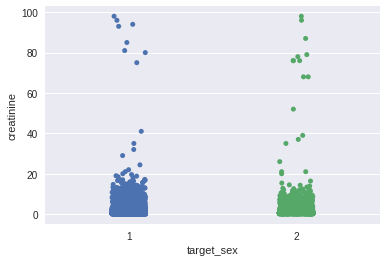

In [ ]:
# 얼만큼 있는지 scattor로 보고 싶지 않니?

sns.stripplot(data=abnormal, x='target_sex', y='creatinine') # 범주형이라 에바다

In [ ]:
# 그렇다면 value_counts()

abnormal['creatinine'].value_counts()

# 정상치인 0.8보다 상대적으로 낮은 값들이 존재
# 기준치 이상은 도대체 어떤 사람인겨

0.7     149263
0.6      99222
0.5      35359
0.4       5469
0.3        552
         ...  
24.4         1
19.0         1
87.0         1
93.0         1
15.1         1
Name: creatinine, Length: 180, dtype: int64

In [ ]:
# sgot_ast의 정상치 0~40
# loc는 null값 포함시킴

abnormal = df_train.loc[-((df_train['sgot_ast']>= 0) & (df_train['sgot_ast']<= 40))]
print("비정상 : %s " %len(abnormal))

비정상 : 66288 


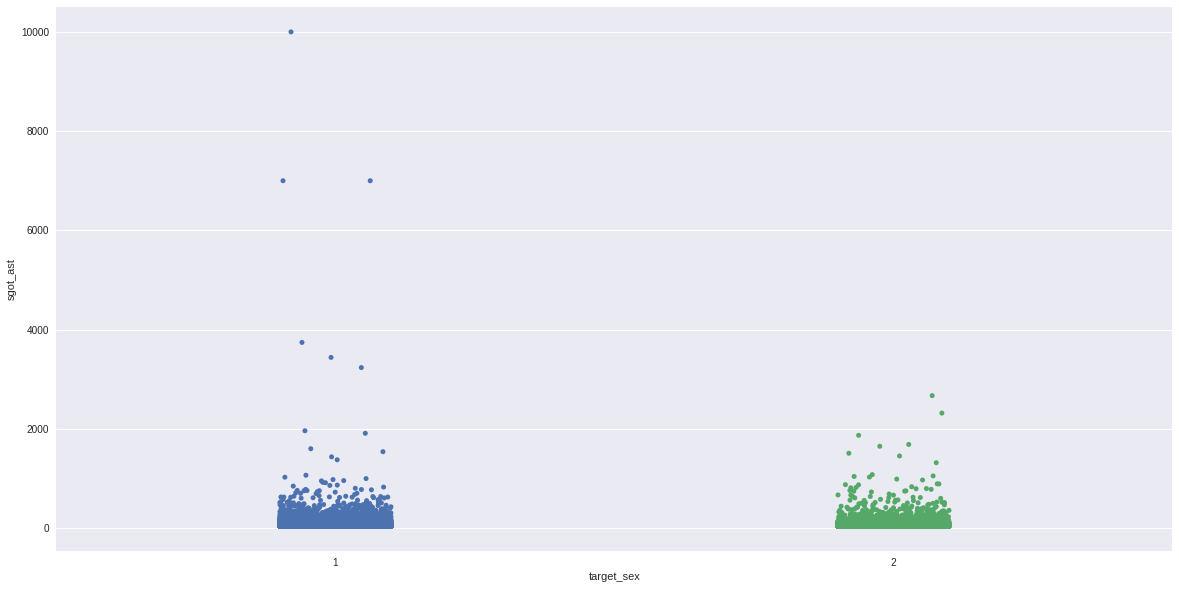

In [ ]:
plt.figure(figsize=(20,10))

sns.stripplot(data=abnormal, x='target_sex', y='sgot_ast')
# 1000값을 가지는건 도대체 뭐야??
# 미친거지

In [ ]:
b = df_train[(df_train['sgot_ast']>40)]
print(len(b)) # 도대체 왜 차이가 나는거야?

66250


In [ ]:
# 바로바로 결측치의 갯수 때문이였다

print(df_train['sgot_ast'].isnull().sum())
print(66288-66250)

38
38


In [ ]:
print("남성의 sgot_ast abnormal percent : ",100*len(abnormal.loc[(abnormal['target_sex']==1)]) / len(df_train.loc[(df_train['target_sex']==1)]))
print("여성의 sgot_ast abnormal percent : ",100*len(abnormal.loc[(abnormal['target_sex']==2)]) / len(df_train.loc[(df_train['target_sex']==2)]))

# 남성이 더 높고 이상치값도 존재함

남성의 sgot_ast abnormal percent :  9.746240325831444
여성의 sgot_ast abnormal percent :  4.676861494494887


In [ ]:
# 나이대 비율로 보고파

age_list = abnormal['target_age'].value_counts().sort_values(ascending=False).index # 이렇게 해도 의미가 없긴 하네

for i in range(len(age_list)):
  print(age_list[i], 'Percent of abnormal value : {:.2f}'.format(100*len(abnormal.loc[(abnormal['target_age']==age_list[i])]) / len(df_train.loc[(df_train['target_age']==age_list[i])])))

# 5,60대가 제일 높고 20대가 제일 낮음

50 Percent of abnormal value : 8.29
40 Percent of abnormal value : 6.99
60 Percent of abnormal value : 8.83
30 Percent of abnormal value : 6.90
70 Percent of abnormal value : 7.65
20 Percent of abnormal value : 4.17
80 Percent of abnormal value : 5.64


In [ ]:
# sgot_alt의 정상치 0~40

abnormal = df_train.loc[-((df_train['sgot_alt']>= 0) & (df_train['sgot_alt']<= 40))]
print("비정상 : %s " %len(abnormal))
print("정상 : %s" %(len(df_train)-len(abnormal)))

비정상 : 112126 
정상 : 787874


In [ ]:
# 비율로 보고파요

print("남성의 sgot_alt abnormal percent : ",100*len(abnormal.loc[(abnormal['target_sex']==1)]) / len(df_train.loc[(df_train['target_sex']==1)]))
print("여성의 sgot_alt abnormal percent : ",100*len(abnormal.loc[(abnormal['target_sex']==2)]) / len(df_train.loc[(df_train['target_sex']==2)]))

# 남성에게서 높은 비율로 발생

남성의 sgot_alt abnormal percent :  18.439059547204913
여성의 sgot_alt abnormal percent :  5.705255288645795


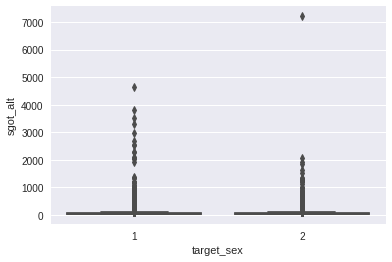

In [ ]:
sns.boxplot(data=abnormal, x='target_sex', y='sgot_alt')
# 여성에게서 이상치 발견

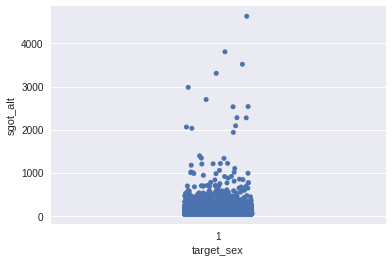

In [ ]:
sns.stripplot(data = abnormal.loc[abnormal['target_sex']==1], x='target_sex', y ='sgot_alt')

In [ ]:
# 나이대 비교

age_list = abnormal['target_age'].value_counts().index 

for i in range(len(age_list)):
  print(age_list[i], 'Percent of abnormal value : {:.2f}'.format(100*len(abnormal.loc[(abnormal['target_age']==age_list[i])]) / len(df_train.loc[(df_train['target_age']==age_list[i])])))

# 20대 ~30대 갈수록 급증, 이후 점차 감소하는 추세
# 나이대에 좀 영향을 받는다 할 수 있음

40 Percent of abnormal value : 13.90
50 Percent of abnormal value : 12.47
30 Percent of abnormal value : 17.23
60 Percent of abnormal value : 10.49
20 Percent of abnormal value : 9.49
70 Percent of abnormal value : 7.17
80 Percent of abnormal value : 3.79


gamma_gtp

In [9]:
# gamma_gtp 정상치 남자 11~39, 여자 8~ 35

ab_man = df_train[df_train['target_sex']==1].loc[-((df_train['gamma_gtp'] >=11)&(df_train['gamma_gtp']<=39))]
ab_wom = df_train[df_train['target_sex']==2].loc[-((df_train['gamma_gtp'] >=8)&(df_train['gamma_gtp']<=35))]

print(len(ab_man), len(ab_wom))
print(188456+55359)

77669 22581
243815


In [11]:
abnormal = pd.concat([ab_man, ab_wom],axis=0,ignore_index=True)
print(len(abnormal))

100250


In [12]:
# 성별 비율을 보자

print("남성의 gamma_gtp abnormal percent : ",100*len(abnormal.loc[(abnormal['target_sex']==1)]) / len(df_train.loc[(df_train['target_sex']==1)]))
print("여성의 gamma_gtp abnormal percent : ",100*len(abnormal.loc[(abnormal['target_sex']==2)]) / len(df_train.loc[(df_train['target_sex']==2)]))

# 남성의 비율이 높다

남성의 gamma_gtp abnormal percent :  39.49043614435778
여성의 gamma_gtp abnormal percent :  13.020013492241961


In [ ]:
# 나이대별

age_list = abnormal['target_age'].value_counts().index 

for i in range(len(age_list)):
  age = '{:}대 Percent of abnormal value : {:.2f}'.format(age_list[i], 100*len(abnormal.loc[(abnormal['target_age']==age_list[i])]) / len(df_train.loc[(df_train['target_age']==age_list[i])]))
  print(age)

# 4,50대가 제일 높고 가까워질수록 높아짐, 그리고 나이들수록 적어짐

40대 Percent of abnormal value : 30.15
50대 Percent of abnormal value : 30.19
30대 Percent of abnormal value : 29.19
60대 Percent of abnormal value : 25.98
70대 Percent of abnormal value : 20.69
20대 Percent of abnormal value : 15.75
80대 Percent of abnormal value : 16.34


## Categorical Feature

'sido', 'hear_L', 'hear_R', 'smk_type', 'drk_yn', 'hchk_yn', 'ttr_yn'  


일단 그려보고 판단

In [ ]:
# sido

In [ ]:
# hear_L, hear_R

In [ ]:
# smk_type - 성별, 나이로 담배 피는 현황 살펴볼 것임

pd.crosstab(df_train['target_sex'],df_train['smk_type'], margins=True)

smk_type,1.0,2.0,3.0,All
target_sex,,,,
1,149342,148660,179261,477263
2,397927,9885,14793,422605
All,547269,158545,194054,899868


In [ ]:
# for col in df_train.columns:
#     msperc = 'column: {:>10}\t NaN value: {:d}'.format(col, df_train[col].isnull().sum())
#     print(msperc)

df_train['smk_type'].isnull().sum()

# 132개의 결측치

132

In [ ]:
"""
1, 2 - 현재 피지 않음
3 - 흡연상태
"""

type0 = df_train.loc[-(df_train['smk_type']==3)] # 여기에 결측치 포함되어 있음
type1 = df_train.loc[df_train['smk_type']==3]
print(len(type0)) # 안피는 사람 
print(len(type1)) # 피는 사람

# 이거 합쳐도 되겄다?

132283
36383


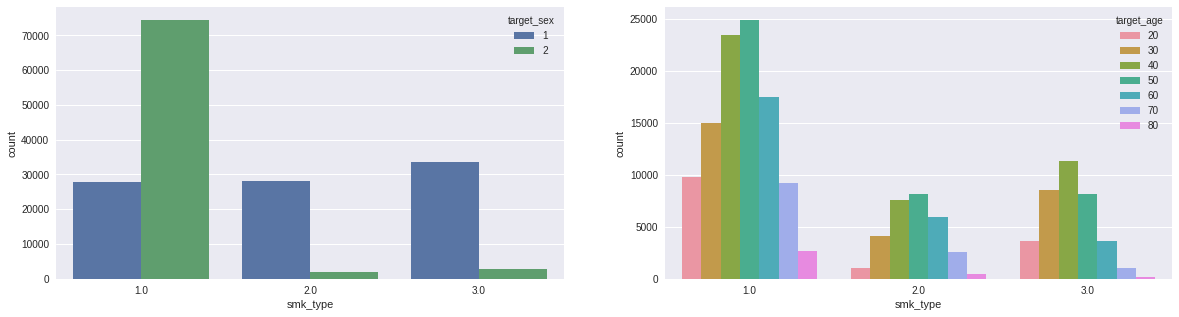

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

sns.countplot(data=df_train, x='smk_type', hue='target_sex', ax=ax[0])
sns.countplot(data=df_train, x='smk_type', hue='target_age', ax=ax[1])

# 흡연을 안하는 사람은 남성보다 여성이 수적으로 더 높음
# 안하는 사람들 중 50대가 제일 많음

In [ ]:
print("남성의 흡연 비율 : ",100*len(type1.loc[(type1['target_sex']==1)]) / len(df_train.loc[(df_train['target_sex']==1)]))
print("여성의 흡연 비율 : ",100*len(type1.loc[(type1['target_sex']==2)]) / len(df_train.loc[(df_train['target_sex']==2)]))

# 남성 흡연 비율이 압도적으로 높음
# 그 중 어느 연령대가 제일 높을까?


남성의 흡연 비율 :  37.55302996472112
여성의 흡연 비율 :  3.4718183427314333


In [ ]:
# 남성의 흡연
type1_man = type1.loc[(type1['target_sex']==1)]
print(len(type1_man))

age_list = type1_man['target_age'].value_counts().index

for i in range(len(age_list)):
  print(age_list[i], 'Percent of smoke : {:.3f}'.format(100*len(type1_man.loc[type1_man['target_age']==age_list[i]]) / len(type1_man)))

# 그 중에서도 40대 남성이 제일 담배 많이 피고
# 80대가 제일 적음

33637
40 Percent of smoke : 31.103
30 Percent of smoke : 23.929
50 Percent of smoke : 22.220
60 Percent of smoke : 10.045
20 Percent of smoke : 9.561
70 Percent of smoke : 2.795
80 Percent of smoke : 0.348


In [ ]:
# 여성의 흡연
type1_wom = type1.loc[(type1['target_sex']==2)]
print(len(type1_wom))

age_list = type1_wom['target_age'].value_counts().index

for i in range(len(age_list)):
  print(age_list[i], 'Percent of smoke : {:.3f}'.format(100*len(type1_wom.loc[type1_wom['target_age']==age_list[i]]) / len(type1_wom)))

# 40대 여성이 제일 많이 피네

2746
40 Percent of smoke : 30.663
50 Percent of smoke : 22.797
20 Percent of smoke : 16.642
30 Percent of smoke : 16.023
60 Percent of smoke : 10.306
70 Percent of smoke : 2.658
80 Percent of smoke : 0.910


In [ ]:
# 비율로 볼 것이여
# type0 : 안하는 사람

age_list = type0['target_age'].value_counts().index

for i in range(len(age_list)):
  print(age_list[i], 'Percent of abnormal value : {:.2f}'.format(100*len(type0.loc[(type0['target_age']==age_list[i])]) / len(df_train.loc[(df_train['target_age']==age_list[i])])))

# 안하는 비율은 7,80대 높고
# 30대가 제일 많이 흡연 중
# 그 중에 어느 성별인지 보고 싶은데 

50 Percent of abnormal value : 80.27
40 Percent of abnormal value : 73.28
60 Percent of abnormal value : 86.39
30 Percent of abnormal value : 69.26
70 Percent of abnormal value : 92.37
20 Percent of abnormal value : 74.75
80 Percent of abnormal value : 95.61


In [ ]:
# 안피는 사람 들 중 가장 많이 차지하는 성별은

type0['target_sex'].value_counts()
print('Man No-Smoke Percent : {:.3f}%'.format(100 *len(type0.loc[type0['target_sex']==1])/len(type0)))
print('Woman No-Smoke Percent : {:.3f}%'.format(100 *len(type0.loc[type0['target_sex']==2])/len(type0)))

# 흡연하지 않는 여성이 흡연하지 않는 남성보다 더 많다

Man No-Smoke Percent : 42.284%
Woman No-Smoke Percent : 57.716%
